In [1]:
import pandas as pd
import config_prod as config
#import json
from datetime import date, timedelta
import phood_api
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
import sklearn
import rawlist

In [2]:
raw = pd.DataFrame(rawlist.masterlist) 

In [3]:
rawfile=raw

In [4]:
raw.columns = ['Date_Produced', 'Log_ID', 'Item_Name', 'Item_Type', 'PLU', 'Logged_Time', 'Meal', 'Action_Taken', 'Action_Reason', 'Quantity', 'Pan_ID', 'Pan_Weight', 'Unit', 'Station', 'Employee_Name', 'imageId', 'Location_ID','Location', 'Served','Saved','Sold','Shrink']

In [5]:
import pandas_profiling
#pandas_profiling.ProfileReport(raw)

## Remove Unit, Meal, Item Type, Employee Name columns

In [6]:
raw = raw.drop(columns=['Unit','Meal','Item_Type','Employee_Name'])

In [7]:
raw['Date_Produced'] = pd.to_datetime(raw['Date_Produced'])
raw['Logged_Time'] = pd.to_datetime(raw['Logged_Time'])

In [8]:
raw['Logged_Date'] = raw['Logged_Time'].dt.date
raw['Logged_Time'] = raw['Logged_Time'].dt.time

In [9]:
raw['Actual_Weight'] = raw['Quantity'] - raw['Pan_Weight']

In [10]:
rawpan = raw

In [11]:
raw = raw.drop(columns=['Log_ID','Date_Produced','Logged_Time','Action_Taken','Action_Reason','Pan_ID','Pan_Weight','imageId'])

In [12]:
file = raw.groupby(['Location_ID','Station','Logged_Date','PLU','Item_Name','Location'],as_index=False).sum()
#file

In [13]:
file = file.reindex(columns = ['Logged_Date', 'Station', 'PLU', 'Item_Name', 'Served','Saved','Shrink','Sold','Quantity','Actual_Weight','Location_ID','Location'])


In [14]:
negativeweights = file[(file.Served < 0) | (file.Saved < 0) | (file.Shrink < 0)]

In [15]:
#negativeweights

In [16]:
file = file[(file['Served'] >= 0) & (file['Saved'] >= 0) & (file['Shrink'] >= 0) & (file['Sold'] >=0)].reset_index(drop=True) 
#file


In [17]:
file0 = file.drop(columns=['Quantity','Actual_Weight'])
#file0

In [18]:
file1 = file[file['Location_ID']==51]
file2 = file[file['Location_ID']==52]
file3 = file[file['Location_ID']==53]
file4 = file[file['Location_ID']==54]
file5 = file[file['Location_ID']==55]
file0 = file0.drop(columns=['Location_ID'])
file1 = file1.drop(columns=['Location_ID'])
file2 = file2.drop(columns=['Location_ID'])
file3 = file3.drop(columns=['Location_ID'])
file4 = file4.drop(columns=['Location_ID'])
file5 = file5.drop(columns=['Location_ID'])

#file1

In [19]:
mod = file0
mod

,Logged_Date,Station,PLU,Item_Name,Served,Saved,Shrink,Sold,Location
0,2019-10-01,HB,26747000000,Cajun Wedged Sweet Potatoes,13.91137,0.0,1.64545,12.26592,Dedham
1,2019-10-01,HB,46000001661,Plantains,4.80615,0.0,1.78307,3.02308,Dedham
2,2019-10-01,HB,46000005678,Chicken Cacciatore,22.88980,0.0,1.27601,21.61379,Dedham
3,2019-10-01,HB,46000007290,Curried Cauliflower,18.25448,0.0,2.74776,15.50672,Dedham
4,2019-10-01,HB,46000007582,Chicken Tenders,45.77823,0.0,6.93147,38.84676,Dedham
...,...,...,...,...,...,...,...,...,...
18802,2019-12-27,SB,46000055829,Blanched Green Beans,3.54743,0.0,0.00000,3.54743,Cranston
18803,2019-12-29,SB,46000007609,"Salad, Kale & Brussels Sprouts SB NA",4.78202,0.0,0.00000,4.78202,Cranston
18804,2019-12-29,SB,46000055823,gigande beans in vinaigrette,2.64353,0.0,1.36485,1.27868,Cranston
18805,2019-12-30,SB,46000057614,Roasted Brussel Sprouts,5.55364,0.0,0.98419,4.56945,Cranston


In [20]:
mod = mod.filter(['Item_Name','Logged_Date','Station','Shrink'], axis=1)

In [21]:
mod

,Item_Name,Logged_Date,Station,Shrink
0,Cajun Wedged Sweet Potatoes,2019-10-01,HB,1.64545
1,Plantains,2019-10-01,HB,1.78307
2,Chicken Cacciatore,2019-10-01,HB,1.27601
3,Curried Cauliflower,2019-10-01,HB,2.74776
4,Chicken Tenders,2019-10-01,HB,6.93147
...,...,...,...,...
18802,Blanched Green Beans,2019-12-27,SB,0.00000
18803,"Salad, Kale & Brussels Sprouts SB NA",2019-12-29,SB,0.00000
18804,gigande beans in vinaigrette,2019-12-29,SB,1.36485
18805,Roasted Brussel Sprouts,2019-12-30,SB,0.98419


In [22]:
mod['Logged_Date'] = pd.to_datetime(mod['Logged_Date'])
mod

,Item_Name,Logged_Date,Station,Shrink
0,Cajun Wedged Sweet Potatoes,2019-10-01,HB,1.64545
1,Plantains,2019-10-01,HB,1.78307
2,Chicken Cacciatore,2019-10-01,HB,1.27601
3,Curried Cauliflower,2019-10-01,HB,2.74776
4,Chicken Tenders,2019-10-01,HB,6.93147
...,...,...,...,...
18802,Blanched Green Beans,2019-12-27,SB,0.00000
18803,"Salad, Kale & Brussels Sprouts SB NA",2019-12-29,SB,0.00000
18804,gigande beans in vinaigrette,2019-12-29,SB,1.36485
18805,Roasted Brussel Sprouts,2019-12-30,SB,0.98419


In [23]:
le = preprocessing.LabelEncoder()
le.fit(mod['Station'])

LabelEncoder()

In [24]:
# View the labels (if you want)
list(le.classes_)


['HB',
 'Hot Bar - ITALIAN',
 'Hot Bar-Breakfast',
 'Hot Bar-Fall Asian',
 'Hot Bar-Oktoberfest',
 'SB',
 'SO']

In [25]:
# Apply the fitted encoder to the pandas column
mod['modstation'] = le.transform(mod['Station'])

In [26]:
le = preprocessing.LabelEncoder()
le.fit(mod['Item_Name'])
list(le.classes_)
# Apply the fitted encoder to the pandas column
mod['moditem'] = le.transform(mod['Item_Name'])

In [27]:
mod

,Item_Name,Logged_Date,Station,Shrink,modstation,moditem
0,Cajun Wedged Sweet Potatoes,2019-10-01,HB,1.64545,0,118
1,Plantains,2019-10-01,HB,1.78307,0,484
2,Chicken Cacciatore,2019-10-01,HB,1.27601,0,153
3,Curried Cauliflower,2019-10-01,HB,2.74776,0,220
4,Chicken Tenders,2019-10-01,HB,6.93147,0,163
...,...,...,...,...,...,...
18802,Blanched Green Beans,2019-12-27,SB,0.00000,5,59
18803,"Salad, Kale & Brussels Sprouts SB NA",2019-12-29,SB,0.00000,5,585
18804,gigande beans in vinaigrette,2019-12-29,SB,1.36485,5,723
18805,Roasted Brussel Sprouts,2019-12-30,SB,0.98419,5,532


In [28]:
mod['Logged_Date'] = mod['Logged_Date'].apply(lambda x: x.toordinal())
mod

,Item_Name,Logged_Date,Station,Shrink,modstation,moditem
0,Cajun Wedged Sweet Potatoes,737333,HB,1.64545,0,118
1,Plantains,737333,HB,1.78307,0,484
2,Chicken Cacciatore,737333,HB,1.27601,0,153
3,Curried Cauliflower,737333,HB,2.74776,0,220
4,Chicken Tenders,737333,HB,6.93147,0,163
...,...,...,...,...,...,...
18802,Blanched Green Beans,737420,SB,0.00000,5,59
18803,"Salad, Kale & Brussels Sprouts SB NA",737422,SB,0.00000,5,585
18804,gigande beans in vinaigrette,737422,SB,1.36485,5,723
18805,Roasted Brussel Sprouts,737423,SB,0.98419,5,532


In [29]:
mod = mod.drop(['Station'], axis=1)
mod = mod.drop(['Item_Name'], axis=1)

In [30]:
mod

,Logged_Date,Shrink,modstation,moditem
0,737333,1.64545,0,118
1,737333,1.78307,0,484
2,737333,1.27601,0,153
3,737333,2.74776,0,220
4,737333,6.93147,0,163
...,...,...,...,...
18802,737420,0.00000,5,59
18803,737422,0.00000,5,585
18804,737422,1.36485,5,723
18805,737423,0.98419,5,532


In [31]:
df_training = mod.loc[mod['Logged_Date'] <= 737347]
df_test = mod.loc[mod['Logged_Date'] > 737347]

In [32]:
df_training

,Logged_Date,Shrink,modstation,moditem
0,737333,1.64545,0,118
1,737333,1.78307,0,484
2,737333,1.27601,0,153
3,737333,2.74776,0,220
4,737333,6.93147,0,163
...,...,...,...,...
18665,737347,0.00000,5,558
18666,737347,0.00000,5,429
18667,737347,0.00000,5,447
18668,737347,0.00000,5,532


In [33]:
df_test

,Logged_Date,Shrink,modstation,moditem
500,737348,0.00000,0,118
501,737348,0.00000,0,484
502,737348,1.91535,0,378
503,737348,0.23984,0,153
504,737348,0.00000,0,220
...,...,...,...,...
18802,737420,0.00000,5,59
18803,737422,0.00000,5,585
18804,737422,1.36485,5,723
18805,737423,0.98419,5,532


# Training and Testing Sets

### Features and Labels

In [34]:
features = mod

In [35]:
# Using numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['Shrink'])

In [36]:
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Shrink', axis = 1)

In [37]:
# Saving feature names for later use
feature_list = list(features.columns)

In [38]:
# Convert to numpy array
features = np.array(features)

In [39]:
labels

array([1.64545, 1.78307, 1.27601, ..., 1.36485, 0.98419, 0.     ])

In [40]:
features

array([[737333,      0,    118],
       [737333,      0,    484],
       [737333,      0,    153],
       ...,
       [737422,      5,    723],
       [737423,      5,    532],
       [737424,      5,    532]])

In [41]:
# Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, shuffle=False)

In [42]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (15045, 3)
Training Labels Shape: (15045,)
Testing Features Shape: (3762, 3)
Testing Labels Shape: (3762,)


## Random Forest

In [43]:
# Instantiate model 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [44]:
train_features.dtype

dtype('int64')

In [45]:
train_labels.dtype

dtype('float64')

In [46]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)
rf_new.fit(train_features, train_labels);

In [47]:
# Use the forest's predict method on the test data
predictions = rf_new.predict(test_features)

In [48]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [49]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.32 degrees.


In [50]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', np.round(accuracy, 2), '%.')

Accuracy: [ -inf   nan  -inf ... 38.73  7.95  -inf] %.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [51]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_labels, predictions)

-0.27411204310749815

In [52]:
from sklearn.metrics import max_error
max_error(test_labels, predictions)

19.0658521

In [53]:
from sklearn.metrics import r2_score
r2_score(test_labels, predictions)

-0.276125573877922

In [54]:
rfer = mean_absolute_error(test_labels, predictions)

In [55]:
rfer

1.32464464289096

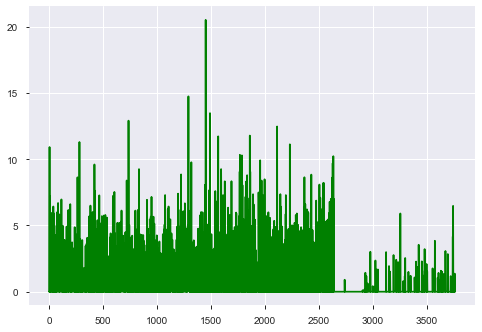

In [56]:
plt.plot(test_labels, color='green')
plt.show()

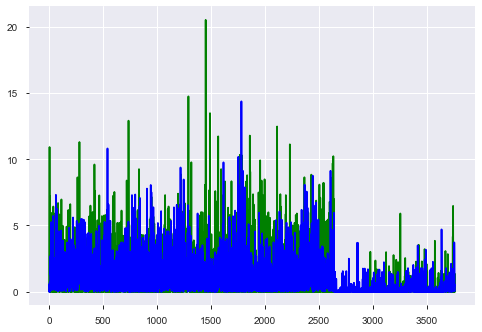

In [57]:
plt.plot(test_labels, color='green')
plt.plot(predictions, color='blue')

plt.show()

In [58]:
mod = file0
mod

,Logged_Date,Station,PLU,Item_Name,Served,Saved,Shrink,Sold,Location
0,2019-10-01,HB,26747000000,Cajun Wedged Sweet Potatoes,13.91137,0.0,1.64545,12.26592,Dedham
1,2019-10-01,HB,46000001661,Plantains,4.80615,0.0,1.78307,3.02308,Dedham
2,2019-10-01,HB,46000005678,Chicken Cacciatore,22.88980,0.0,1.27601,21.61379,Dedham
3,2019-10-01,HB,46000007290,Curried Cauliflower,18.25448,0.0,2.74776,15.50672,Dedham
4,2019-10-01,HB,46000007582,Chicken Tenders,45.77823,0.0,6.93147,38.84676,Dedham
...,...,...,...,...,...,...,...,...,...
18802,2019-12-27,SB,46000055829,Blanched Green Beans,3.54743,0.0,0.00000,3.54743,Cranston
18803,2019-12-29,SB,46000007609,"Salad, Kale & Brussels Sprouts SB NA",4.78202,0.0,0.00000,4.78202,Cranston
18804,2019-12-29,SB,46000055823,gigande beans in vinaigrette,2.64353,0.0,1.36485,1.27868,Cranston
18805,2019-12-30,SB,46000057614,Roasted Brussel Sprouts,5.55364,0.0,0.98419,4.56945,Cranston


In [59]:
mod = mod.filter(['Item_Name','Logged_Date','Station','Sold'], axis=1)

In [60]:
mod

,Item_Name,Logged_Date,Station,Sold
0,Cajun Wedged Sweet Potatoes,2019-10-01,HB,12.26592
1,Plantains,2019-10-01,HB,3.02308
2,Chicken Cacciatore,2019-10-01,HB,21.61379
3,Curried Cauliflower,2019-10-01,HB,15.50672
4,Chicken Tenders,2019-10-01,HB,38.84676
...,...,...,...,...
18802,Blanched Green Beans,2019-12-27,SB,3.54743
18803,"Salad, Kale & Brussels Sprouts SB NA",2019-12-29,SB,4.78202
18804,gigande beans in vinaigrette,2019-12-29,SB,1.27868
18805,Roasted Brussel Sprouts,2019-12-30,SB,4.56945


In [61]:
mod['Logged_Date'] = pd.to_datetime(mod['Logged_Date'])
mod

,Item_Name,Logged_Date,Station,Sold
0,Cajun Wedged Sweet Potatoes,2019-10-01,HB,12.26592
1,Plantains,2019-10-01,HB,3.02308
2,Chicken Cacciatore,2019-10-01,HB,21.61379
3,Curried Cauliflower,2019-10-01,HB,15.50672
4,Chicken Tenders,2019-10-01,HB,38.84676
...,...,...,...,...
18802,Blanched Green Beans,2019-12-27,SB,3.54743
18803,"Salad, Kale & Brussels Sprouts SB NA",2019-12-29,SB,4.78202
18804,gigande beans in vinaigrette,2019-12-29,SB,1.27868
18805,Roasted Brussel Sprouts,2019-12-30,SB,4.56945


In [62]:
le = preprocessing.LabelEncoder()
le.fit(mod['Station'])

LabelEncoder()

In [63]:
# View the labels (if you want)
list(le.classes_)


['HB',
 'Hot Bar - ITALIAN',
 'Hot Bar-Breakfast',
 'Hot Bar-Fall Asian',
 'Hot Bar-Oktoberfest',
 'SB',
 'SO']

In [64]:
# Apply the fitted encoder to the pandas column
mod['modstation'] = le.transform(mod['Station'])

In [65]:
le = preprocessing.LabelEncoder()
le.fit(mod['Item_Name'])
list(le.classes_)
# Apply the fitted encoder to the pandas column
mod['moditem'] = le.transform(mod['Item_Name'])

In [66]:
mod

,Item_Name,Logged_Date,Station,Sold,modstation,moditem
0,Cajun Wedged Sweet Potatoes,2019-10-01,HB,12.26592,0,118
1,Plantains,2019-10-01,HB,3.02308,0,484
2,Chicken Cacciatore,2019-10-01,HB,21.61379,0,153
3,Curried Cauliflower,2019-10-01,HB,15.50672,0,220
4,Chicken Tenders,2019-10-01,HB,38.84676,0,163
...,...,...,...,...,...,...
18802,Blanched Green Beans,2019-12-27,SB,3.54743,5,59
18803,"Salad, Kale & Brussels Sprouts SB NA",2019-12-29,SB,4.78202,5,585
18804,gigande beans in vinaigrette,2019-12-29,SB,1.27868,5,723
18805,Roasted Brussel Sprouts,2019-12-30,SB,4.56945,5,532


In [67]:
mod['Logged_Date'] = mod['Logged_Date'].apply(lambda x: x.toordinal())
mod

,Item_Name,Logged_Date,Station,Sold,modstation,moditem
0,Cajun Wedged Sweet Potatoes,737333,HB,12.26592,0,118
1,Plantains,737333,HB,3.02308,0,484
2,Chicken Cacciatore,737333,HB,21.61379,0,153
3,Curried Cauliflower,737333,HB,15.50672,0,220
4,Chicken Tenders,737333,HB,38.84676,0,163
...,...,...,...,...,...,...
18802,Blanched Green Beans,737420,SB,3.54743,5,59
18803,"Salad, Kale & Brussels Sprouts SB NA",737422,SB,4.78202,5,585
18804,gigande beans in vinaigrette,737422,SB,1.27868,5,723
18805,Roasted Brussel Sprouts,737423,SB,4.56945,5,532


In [68]:
mod = mod.drop(['Station'], axis=1)
mod = mod.drop(['Item_Name'], axis=1)

In [69]:
mod

,Logged_Date,Sold,modstation,moditem
0,737333,12.26592,0,118
1,737333,3.02308,0,484
2,737333,21.61379,0,153
3,737333,15.50672,0,220
4,737333,38.84676,0,163
...,...,...,...,...
18802,737420,3.54743,5,59
18803,737422,4.78202,5,585
18804,737422,1.27868,5,723
18805,737423,4.56945,5,532


In [70]:
df_training = mod.loc[mod['Logged_Date'] <= 737347]
df_test = mod.loc[mod['Logged_Date'] > 737347]

In [71]:
df_training

,Logged_Date,Sold,modstation,moditem
0,737333,12.26592,0,118
1,737333,3.02308,0,484
2,737333,21.61379,0,153
3,737333,15.50672,0,220
4,737333,38.84676,0,163
...,...,...,...,...
18665,737347,5.04054,5,558
18666,737347,3.53835,5,429
18667,737347,2.21862,5,447
18668,737347,5.04657,5,532


In [72]:
df_test

,Logged_Date,Sold,modstation,moditem
500,737348,4.40156,0,118
501,737348,8.32813,0,484
502,737348,0.77162,0,378
503,737348,19.10756,0,153
504,737348,10.24889,0,220
...,...,...,...,...
18802,737420,3.54743,5,59
18803,737422,4.78202,5,585
18804,737422,1.27868,5,723
18805,737423,4.56945,5,532


# Training and Testing Sets

### Features and Labels

In [73]:
features = mod

In [74]:
# Using numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['Sold'])

In [75]:
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Sold', axis = 1)

In [76]:
# Saving feature names for later use
feature_list = list(features.columns)

In [77]:
# Convert to numpy array
features = np.array(features)

In [78]:
labels

array([12.26592,  3.02308, 21.61379, ...,  1.27868,  4.56945,  4.09859])

In [79]:
features

array([[737333,      0,    118],
       [737333,      0,    484],
       [737333,      0,    153],
       ...,
       [737422,      5,    723],
       [737423,      5,    532],
       [737424,      5,    532]])

In [80]:
# Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, shuffle=False)

In [81]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (15045, 3)
Training Labels Shape: (15045,)
Testing Features Shape: (3762, 3)
Testing Labels Shape: (3762,)


## Random Forest

In [82]:
# Instantiate model 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [83]:
train_features.dtype

dtype('int64')

In [84]:
train_labels.dtype

dtype('float64')

In [85]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)
rf_new.fit(train_features, train_labels);

In [86]:
# Use the forest's predict method on the test data
predictions = rf_new.predict(test_features)

In [87]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [88]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 5.03 degrees.


In [89]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', np.round(accuracy, 2), '%.')

Accuracy: [ -10.49   85.45   64.62 ... -222.9    67.29   54.22] %.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [90]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_labels, predictions)

-0.1978827765534943

In [91]:
from sklearn.metrics import max_error
max_error(test_labels, predictions)

50.536609515555526

In [92]:
from sklearn.metrics import r2_score
r2_score(test_labels, predictions)

-0.3068815470388775

In [93]:
rfer = mean_absolute_error(test_labels, predictions)

In [94]:
rfer

5.02969527277647

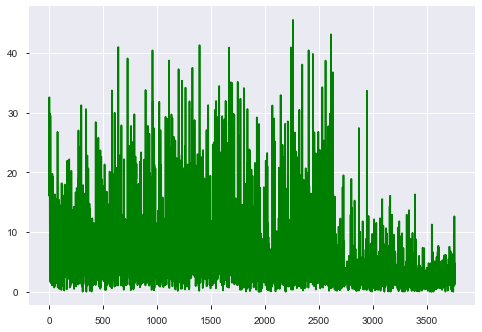

In [95]:
plt.plot(test_labels, color='green')
plt.show()

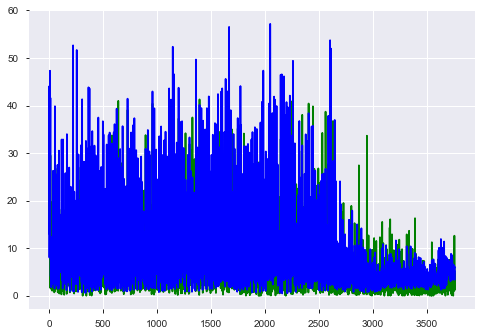

In [96]:
plt.plot(test_labels, color='green')
plt.plot(predictions, color='blue')

plt.show()

In [97]:
rawfile

,Date_Produced,Log_ID,Item_Name,Item_Type,PLU,Logged_Time,Meal,Action_Taken,Action_Reason,Quantity,...,Unit,Station,Employee_Name,imageId,Location_ID,Location,Served,Saved,Sold,Shrink
0,2019-09-30,43120,Spring Mix,Menu Item,46000063050,2019-10-01T06:18:52.000Z,Breakfast,Served,Start,6.45954,...,Lbs,SB,None,None,51,Dedham,4.51954,0.0,4.51954,0.00000
1,2019-09-30,43122,Romaine Lettuce,Menu Item,46000055863,2019-10-01T06:19:06.000Z,Breakfast,Served,Start,6.45954,...,Lbs,SB,None,None,51,Dedham,4.51954,0.0,4.51954,0.00000
2,2019-09-30,43123,Romaine Lettuce,Menu Item,46000055863,2019-10-01T06:19:20.000Z,Breakfast,Served,Start,6.34931,...,Lbs,SB,None,None,51,Dedham,4.40931,0.0,4.40931,0.00000
3,2019-09-30,43124,Baby Spinach,Menu Item,46000055923,2019-10-01T06:19:35.000Z,Breakfast,Served,Start,6.76819,...,Lbs,SB,None,None,51,Dedham,4.82819,0.0,4.82819,0.00000
4,2019-09-30,43194,Plantains,Menu Item,46000001661,2019-10-01T07:06:17.000Z,Breakfast,Served,Start,6.74615,...,Lbs,HB,None,None,51,Dedham,4.80615,0.0,4.80615,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59389,2020-02-01,103082,Tomato Olive Chicken,Menu Item,46000064980,2020-01-05T21:18:01.000Z,Breakfast,Discarded,Over Produced,9.81057,...,Lbs,HB,None,b26b5640302a11eab5ddfbef14d4dab2,55,Cranston,0.00000,0.0,-7.01057,7.01057
59390,2020-02-01,103083,Macaroni & Cheese,Menu Item,46000060414,2020-01-05T21:18:40.000Z,Breakfast,Discarded,Over Produced,4.03446,...,Lbs,HB,None,c8a270b0302a11eab5ddfbef14d4dab2,55,Cranston,0.00000,0.0,-3.08446,3.08446
59391,2020-02-01,103084,Waffle Fries,Menu Item,46000064878,2020-01-05T21:19:04.000Z,Breakfast,Discarded,Over Produced,3.08647,...,Lbs,HB,None,d76a77a0302a11ea8b59c7cbcef30b8c,55,Cranston,0.00000,0.0,-1.18647,1.18647
59392,2020-02-01,103087,White Quinoa,Menu Item,46000055911,2020-01-05T21:23:11.000Z,Breakfast,Discarded,Over Produced,9.36965,...,Lbs,HB,None,6b01d2b0302b11ea8b59c7cbcef30b8c,55,Cranston,0.00000,0.0,-7.46965,7.46965


In [98]:
ans = file0.groupby(['PLU','Item_Name','Location'])['Sold'].sum().sort_values( ascending=False).to_frame().reset_index()
ans[ans.Location == 'Dedham'].head(5)

,PLU,Item_Name,Location,Sold
0,46000007582,Chicken Tenders,Dedham,4487.09786
1,46000064443,Mom's Chicken Soup,Dedham,3527.61445
2,46000063709,Buffalo Wings,Dedham,3119.72314
6,46000016511,Nana's Chicken Noodle Soup,Dedham,2706.29963
7,46000060414,Macaroni & Cheese,Dedham,2664.69720


In [99]:
ans = file1[file1.PLU == '46000007582']
ans = ans.filter(['Logged_Date','Served','Shrink'], axis=1)
ans['Logged_Date'] = ans['Logged_Date'].apply(lambda x: x.toordinal())
ans
#x_train ,x_test = train_test_split(ans,test_size=0.2, shuffle = False)
#x_train
#x_test
#test_data

,Logged_Date,Served,Shrink
4,737333,45.77823,6.93147
42,737334,44.50460,1.27875
83,737335,56.02330,13.17181
111,737336,56.59887,4.06028
144,737337,73.15567,4.05903
...,...,...,...
2786,737425,58.33930,1.54449
2819,737426,40.32630,0.00000
2851,737427,33.40380,0.00000
2869,737428,69.78901,5.40384


In [100]:
features = ans

In [101]:
# Using numpy to convert to arrays
# Labels are the values we want to predict
labels = np.array(features['Shrink'])

In [102]:
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Shrink', axis = 1)

In [103]:
# Saving feature names for later use
feature_list = list(features.columns)

In [104]:
# Convert to numpy array
features = np.array(features)

In [105]:
labels

array([ 6.93147,  1.27875, 13.17181,  4.06028,  4.05903,  6.81606,
       10.93483,  1.14892,  9.34662,  2.43278,  3.04615,  3.17842,
        0.90523,  0.     ,  5.88767,  0.     ,  1.32403,  1.65599,
        3.17717,  0.37604,  1.70007,  0.     ,  2.09691,  0.77288,
        2.95796,  2.31611,  2.49248,  0.     ,  0.57845,  4.80377,
        8.22827,  2.22793,  0.354  ,  8.88715,  5.55943,  7.48389,
        5.1185 ,  2.01515,  0.     ,  0.     ,  0.86106,  2.54301,
        5.84477,  1.78825,  0.11149,  0.31116,  1.36812,  1.25915,
        2.33816,  2.93341,  1.14766,  0.     ,  5.53619,  0.     ,
        2.13974,  2.93466,  1.94385,  2.58193,  0.     ,  2.4043 ,
        0.     ,  1.96337,  4.85793,  3.06694,  2.58067,  0.     ,
        3.0008 ,  0.     ,  2.84648,  0.3099 ,  0.     ,  0.     ,
        0.     ,  0.55241,  0.99334,  0.08944,  0.     ,  0.     ,
        0.     ,  7.74592,  3.48063,  0.     ,  0.     ,  2.05282,
        3.92674,  0.     ,  0.     ,  0.     ,  1.54449,  0.  

In [106]:
features

array([[7.373330e+05, 4.577823e+01],
       [7.373340e+05, 4.450460e+01],
       [7.373350e+05, 5.602330e+01],
       [7.373360e+05, 5.659887e+01],
       [7.373370e+05, 7.315567e+01],
       [7.373380e+05, 3.812180e+01],
       [7.373390e+05, 3.421950e+01],
       [7.373400e+05, 4.100970e+01],
       [7.373410e+05, 6.448180e+01],
       [7.373420e+05, 5.845600e+01],
       [7.373430e+05, 5.531916e+01],
       [7.373440e+05, 4.678842e+01],
       [7.373460e+05, 5.060118e+01],
       [7.373470e+05, 4.026010e+01],
       [7.373480e+05, 7.228633e+01],
       [7.373490e+05, 4.398230e+01],
       [7.373500e+05, 3.895940e+01],
       [7.373510e+05, 5.267350e+01],
       [7.373520e+05, 5.743540e+01],
       [7.373530e+05, 4.719048e+01],
       [7.373540e+05, 4.421290e+01],
       [7.373550e+05, 6.058940e+01],
       [7.373560e+05, 4.228840e+01],
       [7.373570e+05, 4.299410e+01],
       [7.373580e+05, 5.781030e+01],
       [7.373590e+05, 4.599360e+01],
       [7.373600e+05, 4.388349e+01],
 

In [107]:
# Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, shuffle=False)

In [108]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (74, 2)
Training Labels Shape: (74,)
Testing Features Shape: (19, 2)
Testing Labels Shape: (19,)


## Random Forest

In [109]:
# Instantiate model 
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [110]:
train_features.dtype

dtype('float64')

In [111]:
train_labels.dtype

dtype('float64')

In [112]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)
rf_new.fit(train_features, train_labels);

In [113]:
# Use the forest's predict method on the test data
predictions = rf_new.predict(test_features)

In [114]:
# Calculate the absolute errors
errors = abs(predictions - test_labels)

In [115]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.49 degrees.


In [116]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', np.round(accuracy, 2), '%.')

Accuracy: [  47.38 -606.82    -inf    -inf    -inf   13.27   17.88    -inf    -inf
   53.74   50.84    -inf    -inf    -inf   46.91    -inf    -inf   36.94
    -inf] %.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [117]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_labels, predictions)

0.08987576310289591

In [118]:
from sklearn.metrics import max_error
max_error(test_labels, predictions)

6.717863600000003

In [119]:
from sklearn.metrics import r2_score
r2_score(test_labels, predictions)

0.06889389650852873

In [120]:
rfer = mean_absolute_error(test_labels, predictions)

In [121]:
rfer

1.4944700315789479

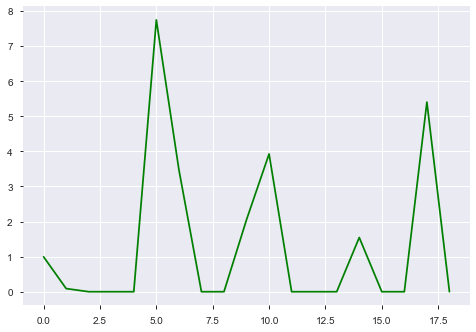

In [122]:
plt.plot(test_labels, color='green')
plt.show()

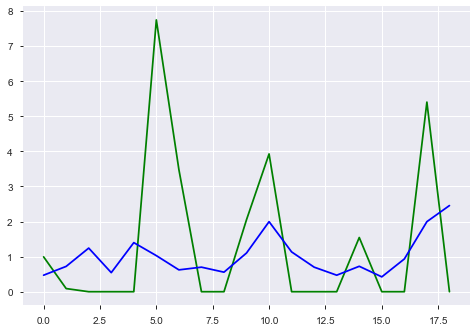

In [123]:
plt.plot(test_labels, color='green')
plt.plot(predictions, color='blue')

plt.show()

In [124]:
ans = file[file.Location=='Cranston']
ans = ans.groupby(['PLU','Item_Name','Station']).size().to_frame('Freq_Count')
ans = ans.sort_values(['Freq_Count'], ascending=False)
ans.to_excel('Itemsasperlocation.xlsx')

In [125]:
with pd.ExcelWriter('Itemsasperlocation.xlsx') as writer:  # doctest: +SKIP
    ans.to_excel(writer,sheet_name='Itemsasperlocation', index = False)
    workbook  = writer.book
    worksheet = writer.sheets['Itemsasperlocation']
    worksheet.set_column(0, 3, 30)
    worksheet.set_column(4, 4, 35)

In [126]:
ans

,,,Freq_Count
PLU,Item_Name,Station,
46000007582,Chicken Tenders,HB,89
46000060414,Macaroni & Cheese,HB,86
46000059700,OMELETTE HAM CHEESE HB,HB,82
46000060011,Bacon,HB,81
46000008433,POTATO HOME FRIES HB,HB,80
...,...,...,...
46000055829,Blanched Green Beans,SB,1
46000055932,Baby Spinach,HB,1
46000056503,Black Beans,HB,1
